In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

In [101]:
dataset = pd.read_csv(r'C:/Users/Downloads/datadell - Book1.csv')

In [102]:
dataset.head()

Customer_id  No_of_products  Warranty  Last_service  Duration(in mnth)  \
0         1245               2         1             0                 17   
1         1234               2         2             5                 10   
2         1235               1         2             0                 17   
3         1236               3         0             0                 13   
4         1237               0         1             0                  6   

   Demand Type _of_Product Purchase Interval Faulty software Faulty hardware  \
0      11            HDisk                 o      Not Faulty          Broken   
1       0       Headphones                 1              -1      Not Faulty   
2       0               PC                 0      Not Faulty         Battery   
3       8         Keyboard                 2              -1          Broken   
4       1               PC                 3      Not Faulty          Broken   

     ...      Antivirus Purchase (yrs) Services Used Number of Tickets raised  \
0    ...                             4          paid                        4   
1    ...                            -1          free                        4   
2    ...                             1          free                        3   
3    ...                            -1          paid                       10   
4    ...                             2          paid                        9   

   Update Period  Wired/Wireless Service_Recommended1  Service Recommended2  \
0             -1           Wired                    1                     4   
1             -1        Wireless                    2                     3   
2              0              -1                    3                     6   
3             -1           Wired                    4                     9   
4              0              -1                    4                     9   

   Service Recommended3  Avg Service Rating  Retention  
0                     7                   5        0.8  
1                     5                   3        0.6  
2                     4                   1        0.2  
3                     5                   3        0.4  
4                     3                   5        0.7  

[5 rows x 21 columns]

In [103]:

dataset.shape

(500, 21)

In [104]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [105]:

train.head()

Customer_id  No_of_products  Warranty  Last_service  Duration(in mnth)  \
249         2461               3         2             5                 13   
433         1528               0         0             0                 22   
19          1318               4         0             0                 20   
322         2174               3         0             4                 20   
332         1315               4         1             5                 11   

     Demand Type _of_Product Purchase Interval Faulty software  \
249       4            HDisk                 1              -1   
433       8               PC                 4            Hang   
19        4            HDisk                 3              -1   
322       1               PC                 7      Not Faulty   
332      11       Headphones                 5            Slow   

    Faulty hardware    ...      Antivirus Purchase (yrs) Services Used  \
249         Battery    ...                            -1          free   
433      Not Faulty    ...                             5          paid   
19           Broken    ...                             1          free   
322          Broken    ...                            -1          free   
332      Not Faulty    ...                             1          free   

    Number of Tickets raised  Update Period  Wired/Wireless  \
249                        1             -1        Wireless   
433                        6             -1           Wired   
19                         4             -1           Wired   
322                        8             -1           Wired   
332                        0              2              -1   

    Service_Recommended1  Service Recommended2  Service Recommended3  \
249                    6                     2                     4   
433                    7                     1                     5   
19                     4                     7                     5   
322                    4                     9                     3   
332                    8                     7                     6   

     Avg Service Rating  Retention  
249                   5        1.0  
433                   5        1.0  
19                    4        0.7  
322                   2        0.3  
332                   5        0.9  

[5 rows x 21 columns]

In [106]:
test.head()

Customer_id  No_of_products  Warranty  Last_service  Duration(in mnth)  \
361         2651               3         1             0                 23   
73          2093               4         1             5                  7   
374         2136               4         1             5                 16   
155         2285               5         0             5                 24   
104         1321               5         0             5                 17   

     Demand Type _of_Product Purchase Interval Faulty software  \
361       3       Headphones                 3              -1   
73        8               PC                 4            Hang   
374       4         Keyboard                 1              -1   
155       3           H Disk                 6              -1   
104       4         Keyboard                 4      Not Faulty   

    Faulty hardware    ...      Antivirus Purchase (yrs) Services Used  \
361          Broken    ...                            -1          paid   
73       Not Faulty    ...                             4          paid   
374         Battery    ...                            -1          free   
155         Battery    ...                             1          paid   
104          Broken    ...                             4          paid   

    Number of Tickets raised  Update Period  Wired/Wireless  \
361                       10             -1           Wired   
73                         5              0              -1   
374                        1             -1        Wireless   
155                        3              1              -1   
104                        4             -1           Wired   

    Service_Recommended1  Service Recommended2  Service Recommended3  \
361                    9                     4                     5   
73                     7                     1                     8   
374                    3                     2                     5   
155                    6                     3                     5   
104                    1                     4                     7   

     Avg Service Rating  Retention  
361                   1        0.1  
73                    2        0.2  
374                   1        0.2  
155                   4        0.7  
104                   5        0.8  

[5 rows x 21 columns]

In [107]:
n_No_of_products = len(dataset.No_of_products.unique())
n_No_of_products

6

In [108]:
n_Last_service = len(dataset.Last_service.unique())
n_Last_service

3

In [109]:
n_Demand = len(dataset.Demand.unique())
n_Demand

6

In [110]:
len(dataset.Service_Recommended1.unique())

9

In [111]:
# creating book embedding path
No_of_products_input = Input(shape=[1], name="No_of_products-Input")
No_of_products_embedding = Embedding(n_No_of_products, 5, name="No_of_products-Embedding")(No_of_products_input)
No_of_products_vec = Flatten(name="Flatten-No_of_products")(No_of_products_embedding)

# creating user embedding path
Last_service_input = Input(shape=[1], name="Last_service-Input")
Last_service_embedding = Embedding(16, 5, name="Last_service-Embedding")(Last_service_input)
Last_service_vec = Flatten(name="Flatten-Last_service")(Last_service_embedding)

Demand_input = Input(shape=[1], name="Demand-Input")
Demand_embedding = Embedding(12, 5, name="Demand-Embedding")(Demand_input)
Demand_vec = Flatten(name="Flatten-Demand")(Demand_embedding)


# concatenate features
conc = Concatenate()([No_of_products_vec,Last_service_vec, Demand_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(4)(fc2)

# Create model and compile it
model2 = Model([No_of_products_input, Last_service_input, Demand_input], out)
model2.compile('adam', 'mean_squared_error')

In [112]:
out

<tf.Tensor 'dense_6/BiasAdd:0' shape=(?, 4) dtype=float32>

In [113]:
test.iloc[:,16:]

Service_Recommended1  Service Recommended2  Service Recommended3  \
361                     9                     4                     5   
73                      7                     1                     8   
374                     3                     2                     5   
155                     6                     3                     5   
104                     1                     4                     7   
394                     3                     6                     9   
377                     4                     7                     9   
124                     8                     7                     6   
68                      8                     7                     1   
450                     7                     1                     5   
9                       7                     5                     4   
194                     2                     5                     4   
406                     4                     9                     5   
84                      4                     9                     5   
371                     1                     4                     7   
388                     4                     9                     5   
495                     7                     9                     5   
30                      4                     1                     2   
316                     4                     9                     3   
408                     6                     4                     9   
490                     2                     9                     5   
491                     5                     9                     4   
280                     6                     9                     2   
356                     6                     9                     4   
76                      4                     9                     5   
461                     3                     6                     4   
497                     4                     9                     5   
211                     4                     9                     5   
101                     7                     8                     1   
334                     2                     4                     1   
..                    ...                   ...                   ...   
352                     4                     5                     9   
341                     6                     4                     3   
277                     4                     9                     5   
290                     3                     6                     9   
317                     5                     1                     2   
304                     6                     4                     9   
268                     6                     2                     5   
69                      4                     9                     5   
455                     6                     4                     2   
465                     9                     4                     5   
154                     5                     3                     4   
82                      3                     6                     9   
477                     4                     9                     5   
172                     8                     7                     1   
321                     7                     5                     4   
90                      2                     5                     4   
180                     4                     9                     5   
414                     8                     7                     5   
312                     1                     4                     7   
278                     2                     3                     5   
381                     4                     9                     5   
472                     7                     1                     2   
362                     5                     3                

In [114]:
from keras.models import load_model

history = model2.fit([train.No_of_products, train.Last_service, train.Demand], train.iloc[:,17:], epochs=50, verbose=1)

Epoch 1/50
400/400 [==============================] - 13s 32ms/step - loss: 18.6040
Epoch 2/50
400/400 [==============================] - 0s 94us/step - loss: 17.3723
Epoch 3/50
400/400 [==============================] - 0s 93us/step - loss: 14.8581
Epoch 4/50
400/400 [==============================] - 0s 106us/step - loss: 10.4518
Epoch 5/50
400/400 [==============================] - 0s 82us/step - loss: 5.6482
Epoch 6/50
400/400 [==============================] - 0s 87us/step - loss: 3.9583
Epoch 7/50
400/400 [==============================] - 0s 96us/step - loss: 3.7586
Epoch 8/50
400/400 [==============================] - 0s 80us/step - loss: 3.7347
Epoch 9/50
400/400 [==============================] - 0s 78us/step - loss: 3.7054
Epoch 10/50
400/400 [==============================] - 0s 82us/step - loss: 3.7098
Epoch 11/50
400/400 [==============================] - 0s 85us/step - loss: 3.6973
Epoch 12/50
400/400 [==============================] - 0s 83us/step - loss: 3.7017
Epoch 1

Text(0, 0.5, 'Training Error')

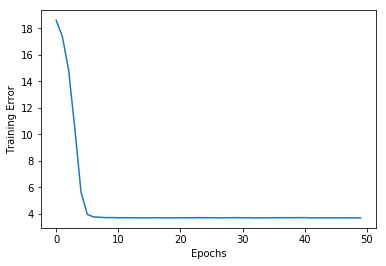

In [115]:
model2.save('regression_model2.h5')
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [116]:
model2.evaluate([test.No_of_products, test.Last_service, test.Demand], test.iloc[:,17:])

100/100 [==============================] - 0s 2ms/step


3.9127970790863036

In [117]:
predictions = model2.predict([test.No_of_products.head(6), test.Last_service.head(6), test.Demand.head(6)])

[print(predictions[i], test.iloc[i,16:]) for i in range(0,6)]

[4.896728  5.217801  3.1136546 0.516636 ] Service_Recommended1      9
Service Recommended2      4
Service Recommended3      5
Avg Service Rating        1
Retention               0.1
Name: 361, dtype: object
[5.5668893 5.7188697 3.4894357 0.5348621] Service_Recommended1      7
Service Recommended2      1
Service Recommended3      8
Avg Service Rating        2
Retention               0.2
Name: 73, dtype: object
[5.303671   5.6881075  3.4260993  0.55435306] Service_Recommended1      3
Service Recommended2      2
Service Recommended3      5
Avg Service Rating        1
Retention               0.2
Name: 374, dtype: object
[5.0432143  5.3654714  3.240399   0.53668296] Service_Recommended1      6
Service Recommended2      3
Service Recommended3      5
Avg Service Rating        4
Retention               0.7
Name: 155, dtype: object
[4.908893  5.3273892 3.216481  0.5522257] Service_Recommended1      1
Service Recommended2      4
Service Recommended3      7
Avg Service Rating        5
Retention  

[None, None, None, None, None, None]

In [118]:
predictions2 = model2.predict([train.No_of_products.head(6), train.Last_service.head(6), train.Demand.head(6)])

[print(predictions2[i], train.iloc[i,16:]) for i in range(0,4)]

[4.804848  5.2236257 3.1193326 0.5236347] Service_Recommended1    6
Service Recommended2    2
Service Recommended3    4
Avg Service Rating      5
Retention               1
Name: 249, dtype: object
[5.0190387 5.1868434 3.189634  0.5351157] Service_Recommended1    7
Service Recommended2    1
Service Recommended3    5
Avg Service Rating      5
Retention               1
Name: 433, dtype: object
[5.2614665 5.6450744 3.3980696 0.564075 ] Service_Recommended1      4
Service Recommended2      7
Service Recommended3      5
Avg Service Rating        4
Retention               0.7
Name: 19, dtype: object
[4.732327   4.9816566  2.974572   0.47443855] Service_Recommended1      4
Service Recommended2      9
Service Recommended3      3
Avg Service Rating        2
Retention               0.3
Name: 322, dtype: object


[None, None, None, None]

In [119]:
predictions3 = model2.predict([train.No_of_products.head(1), train.Last_service.head(1), train.Demand.head(1)])

[print(predictions3)]

[[4.804848  5.2236257 3.1193323 0.5236348]]


[None]

In [120]:
last_service_em = model2.get_layer('Last_service-Embedding')
last_service_em_weights = last_service_em.get_weights()[0]

In [121]:
arr1=[]
def reccomend(arr):
  arr1.clear()
  for i in range(0, len(arr)):
    arr2=[]
    count=0
    for j in range(0, len(arr[i])):
      if(arr[i][j]>0.5):
        count=1
        arr2.append(j)
    if(count==0):
      num=max(arr[i])
      for j in range(0,len(arr[i])):
        if(arr[i][j]==num):
          arr2.append(j)
    arr1.append(arr2)

In [122]:
reccomend(predictions)
print(arr1)

[[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3]]


In [123]:
reccomend(predictions2)
print(arr1)

[[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2], [0, 1, 2, 3], [0, 1, 2, 3]]


In [124]:
reccomend(predictions3)

In [125]:
print(arr1)

[[0, 1, 2, 3]]


In [126]:
for i in range(0,len(arr1)):
  for j in range(0, len(arr1[i])):
    if(arr1[i][j]==0):
      arr1[i][j]='PSP'
    elif(arr1[i][j]==1):
      arr1[i][j]='CS'
      
    elif(arr1[i][j]==2):
      arr1[i][j]='WS'
    elif(arr1[i][j]==3):
      arr1[i][j]='HS'
    elif(arr1[i][j]==4):
      arr1[i][j]='DS'
    elif(arr1[i][j]==5):
      arr1[i][j]='BI'
    elif(arr1[i][j]==6):
      arr1[i][j]='SS'
    elif(arr1[i][j]==7):
      arr1[i][j]='SUP'
    elif(arr1[i][j]==8):
      arr1[i][j]='PS'
    else:
      arr1[i][j]='contact our support staff'
        
    
      

In [127]:
print(arr1)

[['PSP', 'CS', 'WS', 'HS']]


In [128]:
import json
person_dict = [{"service_name":arr1[0][0]}]
with open('./output.json', 'w') as json_file:
  json.dump(person_dict, json_file)

In [129]:
import json
person_dict = {}
person_dict['recommendation']=[]
person_dict['recommendation'].append({'service_name':arr1[0]})
with open('./output.json', 'w') as json_file:
  json.dump(person_dict, json_file)

In [130]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [131]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [132]:
len(dataset['Type _of_Product'].unique())

8

In [133]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
dataset['Type _of_Product']= le.fit_transform(dataset['Type _of_Product']) 


In [134]:
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation, cosine
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt
import sys, os

In [135]:
import sklearn.metrics as metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt
import sys, os

global k,metric
k=2
metric='cosine'
def similarusers(Customer_id,rating, metric = metric, k=k):
    similarities=[]
    indices=[]

    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute') 
    model_knn.fit(rating)

    distances, indices = model_knn.kneighbors(rating.iloc[Customer_id-1, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
    print ('{0} most similar users for User {1}:\n'.format(k,str(Customer_id)))
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == Customer_id:
            continue;

        else:
            print ('{0}: User {1}, with similarity of {2}'.format(i, indices.flatten()[i]+1, similarities.flatten()[i]))

    return similarities,indices

In [136]:
mt=pd.DataFrame(0,index=dataset['Customer_id'].unique(),columns=dataset['Type _of_Product'].unique())

In [137]:
for i in range(500):
    a=dataset['Customer_id'][i]
    b=dataset['Type _of_Product'][i]
    mt[b][a]=dataset['Avg Service Rating'][i]

In [138]:
mt

1  4  7  5  6  2  3  0
1245  5  0  0  0  0  0  0  0
1234  0  3  0  0  0  0  0  0
1235  0  0  3  0  0  0  0  0
1236  0  0  0  3  0  0  0  0
1237  0  0  5  0  0  0  0  0
1238  0  3  5  2  4  5  0  0
1311  4  0  0  0  0  0  0  0
1861  0  5  0  0  0  0  0  0
1831  0  0  0  0  3  0  0  0
1863  0  4  0  0  0  0  0  0
1016  0  0  5  0  0  0  0  0
1383  0  0  0  1  0  0  0  0
1567  0  0  0  2  0  0  0  0
1259  0  3  0  0  0  0  0  0
1222  5  0  0  0  0  0  0  0
1595  0  0  2  0  0  0  0  0
1318  4  0  0  0  0  0  0  0
2378  1  0  4  0  0  0  0  2
1921  0  0  0  0  4  0  0  0
2455  0  1  0  0  0  0  0  0
2021  3  0  0  0  0  0  0  0
2477  0  0  3  0  2  0  0  0
1785  0  0  0  0  3  0  0  0
1923  0  4  0  0  0  0  0  0
1844  0  0  0  1  0  0  0  0
2328  5  0  0  0  0  0  0  0
2319  0  0  0  0  4  0  0  0
1331  0  0  0  1  0  0  0  0
1268  3  1  0  4  5  0  0  0
1582  0  0  3  0  0  0  0  0
...  .. .. .. .. .. .. .. ..
1561  0  4  0  0  0  0  0  0
2422  5  0  0  0  0  0  0  0
1491  0  0  2  0  0  0  0  0
2391  4  0  0  0  0  0  0  0
2189  1  0  0  0  0  0  0  0
1577  0  5  0  0  0  0  0  0
1475  0  0  0  2  0  0  0  0
2508  0  1  0  0  0  0  0  0
1452  0  0  0  0  3  0  0  0
1930  3  0  0  0  0  0  0  0
1607  0  4  5  0  0  0  0  0
1811  0  0  0  1  0  0  0  0
2333  0  0  0  3  0  0  0  0
2540  0  2  0  0  0  0  0  0
1064  4  0  0  0  0  0  0  0
1610  0  0  1  0  0  0  0  0
1485  3  0  0  0  0  0  0  0
1162  5  0  0  0  0  0  0  0
2581  0  2  0  0  0  0  0  0
1373  0  0  1  0  0  0  0  0
2628  0  0  0  0  5  0  0  0
1556  0  0  0  3  0  0  0  0
1750  0  0  1  0  0  0  0  0
2597  2  0  0  0  0  0  0  0
2499  0  5  0  0  0  0  0  0
1909  0  1  0  0  0  0  0  0
2203  0  0  0  4  0  0  0  0
1260  0  0  0  2  0  0  0  0
1119  0  5  0  0  0  0  0  0
1249  0  0  3  0  0  0  0  0

[425 rows x 8 columns]

In [139]:
from sklearn.metrics import pairwise_distances

In [140]:
cosine_sim=1-pairwise_distances(mt,metric='cosine')

In [141]:
pd.DataFrame(cosine_sim)

0         1         2         3         4         5         6    \
0    1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
1    0.000000  1.000000  0.000000  0.000000  0.000000  0.337526  0.000000   
2    0.000000  0.000000  1.000000  0.000000  1.000000  0.562544  0.000000   
3    0.000000  0.000000  0.000000  1.000000  0.000000  0.225018  0.000000   
4    0.000000  0.000000  1.000000  0.000000  1.000000  0.562544  0.000000   
5    0.000000  0.337526  0.562544  0.225018  0.562544  1.000000  0.000000   
6    1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
7    0.000000  1.000000  0.000000  0.000000  0.000000  0.337526  0.000000   
8    0.000000  0.000000  0.000000  0.000000  0.000000  0.450035  0.000000   
9    0.000000  1.000000  0.000000  0.000000  0.000000  0.337526  0.000000   
10   0.000000  0.000000  1.000000  0.000000  1.000000  0.562544  0.000000   
11   0.000000  0.000000  0.000000  1.000000  0.000000  0.225018  0.000000   
12   0.000000  0.000000  0.000000  1.000000  0.000000  0.225018  0.000000   
13   0.000000  1.000000  0.000000  0.000000  0.000000  0.337526  0.000000   
14   1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
15   0.000000  0.000000  1.000000  0.000000  1.000000  0.562544  0.000000   
16   1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
17   0.218218  0.000000  0.872872  0.000000  0.872872  0.491029  0.218218   
18   0.000000  0.000000  0.000000  0.000000  0.000000  0.450035  0.000000   
19   0.000000  1.000000  0.000000  0.000000  0.000000  0.337526  0.000000   
20   1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
21   0.000000  0.000000  0.832050  0.000000  0.832050  0.717699  0.000000   
22   0.000000  0.000000  0.000000  0.000000  0.000000  0.450035  0.000000   
23   0.000000  1.000000  0.000000  0.000000  0.000000  0.337526  0.000000   
24   0.000000  0.000000  0.000000  1.000000  0.000000  0.225018  0.000000   
25   1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
26   0.000000  0.000000  0.000000  0.000000  0.000000  0.450035  0.000000   
27   0.000000  0.000000  0.000000  1.000000  0.000000  0.225018  0.000000   
28   0.420084  0.140028  0.000000  0.560112  0.000000  0.488386  0.420084   
29   0.000000  0.000000  1.000000  0.000000  1.000000  0.562544  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.000000  1.000000  0.000000  0.000000  0.000000  0.337526  0.000000   
396  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
397  0.000000  0.000000  1.000000  0.000000  1.000000  0.562544  0.000000   
398  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
399  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
400  0.000000  1.000000  0.000000  0.000000  0.000000  0.337526  0.000000   
401  0.000000  0.000000  0.000000  1.000000  0.000000  0.225018  0.000000   
402  0.000000  1.000000  0.000000  0.000000  0.000000  0.337526  0.000000   
403  0.000000  0.000000  0.000000  0.000000  0.000000  0.450035  0.000000   
404  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
405  0.000000  0.624695  0.780869  0.000000  0.780869  0.650124  0.000000   
406  0.000000  0.000000  0.000000  1.000000  0.000000  0.225018  0.000000   
407  0.000000  0.000000  0.000000  1.000000  0.000000  0.225018  0.000000   
408  0.000000  1.000000  0.000000  0.000000  0.000000  0.337526  0.000000   
409  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
410  0.000000  0.000000  1.000000  0.000000  1.000000  0.562544  0.000000   
411  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
412  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
413  0.000000  1.000000  0.000000  0.000000  0.000000  0.337526  0.000000   
414  0.000000  0.000000  1.000000  0.000000  1.000000  0.562544  0.000000   
415  0

In [142]:
x_train, x_test = train_test_split(mt, test_size=0.2, random_state=42)

In [143]:
similarities,indices=similarusers(1,mt,metric='cosine')

2 most similar users for User 1:

1: User 7, with similarity of 1.0
2: User 15, with similarity of 1.0


In [50]:
print(dataset['Type _of_Product'])

0      1
1      4
2      7
3      5
4      7
5      4
6      6
7      5
8      7
9      1
10     4
11     6
12     4
13     7
14     5
15     5
16     4
17     1
18     7
19     1
20     7
21     6
22     4
23     1
24     7
25     6
26     4
27     5
28     1
29     6
      ..
470    4
471    6
472    4
473    7
474    5
475    5
476    4
477    1
478    7
479    1
480    1
481    4
482    7
483    5
484    7
485    4
486    6
487    5
488    7
489    1
490    4
491    6
492    4
493    7
494    5
495    5
496    4
497    1
498    7
499    1
Name: Type _of_Product, Length: 500, dtype: int32


In [51]:
dataset['Type _of_Product'].unique()

array([1, 4, 7, 5, 6, 2, 3, 0], dtype=int64)

In [91]:
import mysql.connector
conn = mysql.connector.connect(host='172.17.9.2', database='dellpro', user='root', password='password')

if conn.is_connected():
    db_Info = conn.get_server_info()
    print("Connected to MySQL Server version ", db_Info)
    c = conn.cursor()

    #CODE for ENTRY TABLE
    mySql_insert_query = """INSERT INTO signup(uid,email,pass) 
                                   VALUES (%s, %s,%s) """
    s='p'
    recordTuple = ('y','sakshi@gmail.com',s)
    c.execute(mySql_insert_query, recordTuple)
    print("entry success")
         #EXCEPTION HANDLING CODE
#except Error as e:
#    print("Error while connecting to MySQL", e)

#CODE TO COMMIT AND CLOSE THE CONNECTION TO DATABASE
#finally:
if (conn.is_connected()):
    c.close()
    conn.commit()
    conn.close()
    print("MySQL connection is closed")

Connected to MySQL Server version  5.5.5-10.4.8-MariaDB
entry success
MySQL connection is closed


In [89]:
int(indices[0][0])

0

In [17]:
import mysql.connector
conn = mysql.connector.connect(host='172.17.9.2', database='dellpro', user='root', password='password')

if conn.is_connected():
    db_Info = conn.get_server_info()
    print("Connected to MySQL Server version ", db_Info)
    c = conn.cursor()

    #CODE for ENTRY TABLE
    mySql_insert_query = """INSERT INTO predict(uid,service_recomm1,service_service4) 
  VALUES(%s,%s,%s)"""
    #recordTuple = (int(indices[0][0]),arr1[0][0],arr1[0][1],arr1[0][2],0,0)
    recordTuple=('x1t','DS','Premium')
    c.execute(mySql_insert_query, recordTuple)
    print("entry success")
         #EXCEPTION HANDLING CODE
#except Error as e:
#    print("Error while connecting to MySQL", e)

#CODE TO COMMIT AND CLOSE THE CONNECTION TO DATABASE
#finally:
if (conn.is_connected()):
    c.close()
    conn.commit()
    conn.close()
    print("MySQL connection is closed")

Connected to MySQL Server version  5.5.5-10.4.8-MariaDB


ProgrammingError: 1054 (42S22): Unknown column 'service_service4' in 'field list'

In [98]:
#CODE for ENTRY TABLE
mySql_insert_query = """INSERT INTO recommender(`c_id`,`service_recomm1`,`service_recomm2`,`service_recomm3`,
    `antivirus_recomm`,`warranty_recomm`) 
                                   VALUES (%s, %s,%s,%s,%d,%d) """
for i in range(0,6):
    recordTuple = (indices[i],predictions[i],predictions1[i],predictions2[i])
    c.execute(mySql_insert_query, recordTuple)
    print("entry success")

NameError: name 'predictions1' is not defined